西瓜书习题3.3:编程实现对率回归，并给出西瓜数据集3.0a上的结果

In [1]:
import numpy as np
from numpy import linalg
data = np.array([[0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437, 0.666, 0.243, 0.245, 0.343, 0.639, 0.657, 0.360, 0.593, 0.719],
       [0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211, 0.091, 0.267, 0.057, 0.099, 0.161, 0.198, 0.370, 0.042, 0.103],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])
label=np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0])

In [2]:
#一行包含一个样例（x；1），程序中w为（w；b）
data =data.T

In [3]:
'''
代价函数：西瓜书公式3.27

@para   data：数据集
@para   label：标签
@para   w：权值加上偏置（w；b）
@return loat：当前权值输入下计算得到的误差损失
'''
def cost_f(data,label,w):
    lost = 0.0
    for i in range(data.shape[0]):
        x = data[i]
        lost = lost+ (-label[i] * np.dot(w.T,x) + np.log(1 + np.exp(np.dot(w.T,x)))) 
    return lost

牛顿法

In [4]:
'''
西瓜书公式3.23，计算后验概率估计p（y=1|x）

@para   x：数据集
@para   w：权值加上偏置（w；b）
@return p1
'''
def p1(x, w):
    temp = np.exp(np.dot(w.T,x))
    return temp/(1+temp)
'''
#西瓜书公式3.30，计算损失函数的一阶导

@para   data：数据集
@para   label：标签
@para   w：权值加上偏置（w；b）
@return w_1d：损失函数的一阶导
'''
def cost_f_1differential(w, data, label):
    w_1d = np.array(np.zeros(data[0].shape))
    for i in range(data.shape[0]):  
        x = data[i]
        y = label[i]
        w_1d += -np.dot(x, (y - p1(x, w)))
    return w_1d;
'''
#西瓜书公式3.31，计算损失函数的二阶导

@para   data：数据集
@para   w：权值加上偏置（w；b）
@return w_2d：损失函数的二阶导
'''
def cost_f_2differential(w, data):
    w_2d = 0.0
    for i in range(data.shape[0]):
        x = data[i]
        w_2d += np.dot(x,x.T)*(1 - p1(x, w))*p1(x, w)
    return w_2d;
'''
#牛顿法迭代计算似然函数最小值

@para   data：数据集
@para   label：标签
@para   w：权值加上偏置（w；b）
@return w：更新后的w
'''
def newton_method(w, data, label):
    cost_last = 0
    cost= 1
    i =0
    while(np.abs(cost-cost_last)>0.00001):
        cost_last = cost
        w_1d = cost_f_1differential(w, data, label)
        w_2d = cost_f_2differential(w, data)
        w = w - w_1d/w_2d
        cost = cost_f(data,label,w)
        i=i+1
        print('period:',i,' cost is:',cost)
    return w

In [5]:
#初始化w，表示（w；b），在西瓜数据集3.0中为三位
w0 = np.array(np.zeros(data[0].shape))

In [6]:
#牛顿法计算，返回最优解
w = newton_method(w0, data, label)

period: 1  cost is: 11.718483841701428
period: 2  cost is: 11.663885021597467
period: 3  cost is: 11.61052579882915
period: 4  cost is: 11.55836950185784
period: 5  cost is: 11.507383257450465
period: 6  cost is: 11.457535132822368
period: 7  cost is: 11.408794165275152
period: 8  cost is: 11.361130334893245
period: 9  cost is: 11.314514536400706
period: 10  cost is: 11.268918551564868
period: 11  cost is: 11.224315022197851
period: 12  cost is: 11.180677423771886
period: 13  cost is: 11.13798003965988
period: 14  cost is: 11.096197936009235
period: 15  cost is: 11.055306937253766
period: 16  cost is: 11.015283602265885
period: 17  cost is: 10.976105201148819
period: 18  cost is: 10.937749692666438
period: 19  cost is: 10.900195702306473
period: 20  cost is: 10.863422500971273
period: 21  cost is: 10.82740998428871
period: 22  cost is: 10.792138652534886
period: 23  cost is: 10.757589591158965
period: 24  cost is: 10.723744451899805
period: 25  cost is: 10.6905854344832
period: 26  cos

period: 240  cost is: 8.80941272926586
period: 241  cost is: 8.808020183175966
period: 242  cost is: 8.806644127448081
period: 243  cost is: 8.805284349474586
period: 244  cost is: 8.803940639678355
period: 245  cost is: 8.802612791464481
period: 246  cost is: 8.801300601172821
period: 247  cost is: 8.800003868031405
period: 248  cost is: 8.798722394110687
period: 249  cost is: 8.797455984278605
period: 250  cost is: 8.79620444615645
period: 251  cost is: 8.794967590075501
period: 252  cost is: 8.793745229034458
period: 253  cost is: 8.792537178657604
period: 254  cost is: 8.791343257153711
period: 255  cost is: 8.790163285275671
period: 256  cost is: 8.78899708628084
period: 257  cost is: 8.787844485892071
period: 258  cost is: 8.78670531225942
period: 259  cost is: 8.785579395922541
period: 260  cost is: 8.78446656977372
period: 261  cost is: 8.783366669021548
period: 262  cost is: 8.78227953115523
period: 263  cost is: 8.781204995909508
period: 264  cost is: 8.780142905230186
period

period: 615  cost is: 8.686366673155014
period: 616  cost is: 8.686340363750062
period: 617  cost is: 8.686314313172796
period: 618  cost is: 8.686288518832527
period: 619  cost is: 8.686262978165177
period: 620  cost is: 8.686237688632948
period: 621  cost is: 8.686212647724073
period: 622  cost is: 8.686187852952514
period: 623  cost is: 8.68616330185772
period: 624  cost is: 8.686138992004327
period: 625  cost is: 8.686114920981916
period: 626  cost is: 8.68609108640473
period: 627  cost is: 8.68606748591142
period: 628  cost is: 8.686044117164794
period: 629  cost is: 8.686020977851554
period: 630  cost is: 8.685998065682035
period: 631  cost is: 8.685975378389976
period: 632  cost is: 8.68595291373226
period: 633  cost is: 8.685930669488664
period: 634  cost is: 8.685908643461632
period: 635  cost is: 8.685886833476033
period: 636  cost is: 8.685865237378913
period: 637  cost is: 8.685843853039259
period: 638  cost is: 8.68582267834781
period: 639  cost is: 8.685801711216765
perio

In [7]:
#画图显示最终结果
import matplotlib.pyplot as plt
for i in range(data.shape[0]):
    if(label[i]==0):
        plt.plot(data[i][0],data[i][1],'r+')
    else:
        plt.plot(data[i][0],data[i][1],'bo')
x = np.linspace(0, 1, 50)
y = -w[0]/w[1]*x - w[2]/w[1]
plt.plot(x,y,'y-')
plt.show()

<Figure size 640x480 with 1 Axes>

SGD：随机梯度下降

In [8]:
'''
梯度下降更新w

@para   data：数据集
@para   label：标签
@para   w：权值加上偏置（w；b）
@para   period：周期
@return w：更新后的w
'''
def GD(w, data, label,period):
    a = 0.001   #学习率
    cost_last = 0
    for i in range(period):
        w = w - a * cost_f_1differential(w, data, label)
        cost = cost_f(data,label,w)
        print('period:',i,' cost is:',cost)
        if(np.abs(cost-cost_last)<0.00001):
            return w
    return w

period: 0  cost is: 11.783071230195219
period: 1  cost is: 11.78264161583686
period: 2  cost is: 11.78221321306117
period: 3  cost is: 11.781786008636665
period: 4  cost is: 11.781359989481548
period: 5  cost is: 11.780935142661956
period: 6  cost is: 11.780511455390338
period: 7  cost is: 11.780088915023768
period: 8  cost is: 11.779667509062346
period: 9  cost is: 11.779247225147543
period: 10  cost is: 11.77882805106063
period: 11  cost is: 11.778409974721095
period: 12  cost is: 11.77799298418507
period: 13  cost is: 11.77757706764381
period: 14  cost is: 11.777162213422129
period: 15  cost is: 11.77674840997693
period: 16  cost is: 11.776335645895688
period: 17  cost is: 11.775923909894981
period: 18  cost is: 11.775513190819028
period: 19  cost is: 11.775103477638256
period: 20  cost is: 11.774694759447858
period: 21  cost is: 11.774287025466398
period: 22  cost is: 11.773880265034405
period: 23  cost is: 11.773474467613006
period: 24  cost is: 11.773069622782543
period: 25  cost

period: 286  cost is: 11.682693989894847
period: 287  cost is: 11.682375749776913
period: 288  cost is: 11.682057596391262
period: 289  cost is: 11.681739529222591
period: 290  cost is: 11.681421547761355
period: 291  cost is: 11.681103651503697
period: 292  cost is: 11.680785839951417
period: 293  cost is: 11.680468112611877
period: 294  cost is: 11.680150468997947
period: 295  cost is: 11.679832908627949
period: 296  cost is: 11.679515431025592
period: 297  cost is: 11.679198035719908
period: 298  cost is: 11.678880722245195
period: 299  cost is: 11.678563490140943
period: 300  cost is: 11.67824633895181
period: 301  cost is: 11.677929268227528
period: 302  cost is: 11.677612277522865
period: 303  cost is: 11.677295366397548
period: 304  cost is: 11.676978534416246
period: 305  cost is: 11.676661781148464
period: 306  cost is: 11.676345106168538
period: 307  cost is: 11.67602850905553
period: 308  cost is: 11.675711989393216
period: 309  cost is: 11.675395546770014
period: 310  cost 

period: 536  cost is: 11.605080727717889
period: 537  cost is: 11.60477648162967
period: 538  cost is: 11.604472278417866
period: 539  cost is: 11.6041681180471
period: 540  cost is: 11.603864000482318
period: 541  cost is: 11.603559925688806
period: 542  cost is: 11.603255893632179
period: 543  cost is: 11.602951904278365
period: 544  cost is: 11.602647957593632
period: 545  cost is: 11.602344053544545
period: 546  cost is: 11.602040192097999
period: 547  cost is: 11.601736373221186
period: 548  cost is: 11.60143259688161
period: 549  cost is: 11.601128863047078
period: 550  cost is: 11.600825171685702
period: 551  cost is: 11.600521522765881
period: 552  cost is: 11.600217916256305
period: 553  cost is: 11.59991435212597
period: 554  cost is: 11.599610830344133
period: 555  cost is: 11.59930735088036
period: 556  cost is: 11.59900391370448
period: 557  cost is: 11.598700518786606
period: 558  cost is: 11.598397166097119
period: 559  cost is: 11.598093855606676
period: 560  cost is: 1

period: 785  cost is: 11.530590266865433
period: 786  cost is: 11.530296086270988
period: 787  cost is: 11.530001944670323
period: 788  cost is: 11.529707842056066
period: 789  cost is: 11.529413778420876
period: 790  cost is: 11.52911975375742
period: 791  cost is: 11.528825768058404
period: 792  cost is: 11.528531821316527
period: 793  cost is: 11.528237913524531
period: 794  cost is: 11.527944044675165
period: 795  cost is: 11.5276502147612
period: 796  cost is: 11.52735642377543
period: 797  cost is: 11.52706267171066
period: 798  cost is: 11.526768958559718
period: 799  cost is: 11.52647528431545
period: 800  cost is: 11.526181648970718
period: 801  cost is: 11.525888052518404
period: 802  cost is: 11.525594494951408
period: 803  cost is: 11.52530097626264
period: 804  cost is: 11.525007496445042
period: 805  cost is: 11.524714055491561
period: 806  cost is: 11.524420653395163
period: 807  cost is: 11.524127290148838
period: 808  cost is: 11.523833965745578
period: 809  cost is: 1

period: 1035  cost is: 11.458241904769572
period: 1036  cost is: 11.457957273504972
period: 1037  cost is: 11.45767267970271
period: 1038  cost is: 11.457388123357223
period: 1039  cost is: 11.457103604462942
period: 1040  cost is: 11.456819123014302
period: 1041  cost is: 11.456534679005747
period: 1042  cost is: 11.456250272431715
period: 1043  cost is: 11.455965903286646
period: 1044  cost is: 11.45568157156499
period: 1045  cost is: 11.455397277261186
period: 1046  cost is: 11.455113020369684
period: 1047  cost is: 11.454828800884936
period: 1048  cost is: 11.454544618801389
period: 1049  cost is: 11.454260474113498
period: 1050  cost is: 11.453976366815718
period: 1051  cost is: 11.453692296902496
period: 1052  cost is: 11.453408264368301
period: 1053  cost is: 11.453124269207583
period: 1054  cost is: 11.45284031141481
period: 1055  cost is: 11.452556390984444
period: 1056  cost is: 11.452272507910939
period: 1057  cost is: 11.451988662188773
period: 1058  cost is: 11.45170485381

period: 1285  cost is: 11.388235998269991
period: 1286  cost is: 11.38796056266355
period: 1287  cost is: 11.387685163164964
period: 1288  cost is: 11.387409799768927
period: 1289  cost is: 11.38713447247013
period: 1290  cost is: 11.386859181263269
period: 1291  cost is: 11.38658392614303
period: 1292  cost is: 11.386308707104115
period: 1293  cost is: 11.386033524141222
period: 1294  cost is: 11.385758377249044
period: 1295  cost is: 11.385483266422272
period: 1296  cost is: 11.385208191655614
period: 1297  cost is: 11.384933152943761
period: 1298  cost is: 11.38465815028142
period: 1299  cost is: 11.384383183663282
period: 1300  cost is: 11.384108253084054
period: 1301  cost is: 11.38383335853843
period: 1302  cost is: 11.383558500021124
period: 1303  cost is: 11.383283677526832
period: 1304  cost is: 11.383008891050254
period: 1305  cost is: 11.382734140586104
period: 1306  cost is: 11.38245942612907
period: 1307  cost is: 11.382184747673875
period: 1308  cost is: 11.38191010521522

period: 1518  cost is: 11.325024462204992
period: 1519  cost is: 11.324757297714928
period: 1520  cost is: 11.324490168114645
period: 1521  cost is: 11.32422307339899
period: 1522  cost is: 11.323956013562816
period: 1523  cost is: 11.323688988600974
period: 1524  cost is: 11.323421998508316
period: 1525  cost is: 11.323155043279698
period: 1526  cost is: 11.322888122909973
period: 1527  cost is: 11.322621237394001
period: 1528  cost is: 11.322354386726627
period: 1529  cost is: 11.322087570902715
period: 1530  cost is: 11.321820789917119
period: 1531  cost is: 11.3215540437647
period: 1532  cost is: 11.321287332440312
period: 1533  cost is: 11.321020655938815
period: 1534  cost is: 11.320754014255076
period: 1535  cost is: 11.320487407383945
period: 1536  cost is: 11.320220835320287
period: 1537  cost is: 11.319954298058965
period: 1538  cost is: 11.31968779559484
period: 1539  cost is: 11.319421327922777
period: 1540  cost is: 11.31915489503763
period: 1541  cost is: 11.3188884969342

period: 1734  cost is: 11.26811860287456
period: 1735  cost is: 11.26785885611461
period: 1736  cost is: 11.267599143147635
period: 1737  cost is: 11.267339463968627
period: 1738  cost is: 11.267079818572586
period: 1739  cost is: 11.266820206954502
period: 1740  cost is: 11.266560629109382
period: 1741  cost is: 11.266301085032207
period: 1742  cost is: 11.266041574717987
period: 1743  cost is: 11.26578209816171
period: 1744  cost is: 11.265522655358383
period: 1745  cost is: 11.265263246303
period: 1746  cost is: 11.265003870990563
period: 1747  cost is: 11.264744529416072
period: 1748  cost is: 11.264485221574532
period: 1749  cost is: 11.26422594746094
period: 1750  cost is: 11.2639667070703
period: 1751  cost is: 11.26370750039761
period: 1752  cost is: 11.263448327437883
period: 1753  cost is: 11.26318918818612
period: 1754  cost is: 11.262930082637324
period: 1755  cost is: 11.262671010786505
period: 1756  cost is: 11.262411972628662
period: 1757  cost is: 11.262152968158809
per

period: 1963  cost is: 11.209508979182376
period: 1964  cost is: 11.209256841628703
period: 1965  cost is: 11.209004736738823
period: 1966  cost is: 11.208752664507891
period: 1967  cost is: 11.208500624931048
period: 1968  cost is: 11.208248618003442
period: 1969  cost is: 11.207996643720216
period: 1970  cost is: 11.207744702076518
period: 1971  cost is: 11.207492793067498
period: 1972  cost is: 11.20724091668831
period: 1973  cost is: 11.206989072934093
period: 1974  cost is: 11.206737261800004
period: 1975  cost is: 11.206485483281192
period: 1976  cost is: 11.206233737372806
period: 1977  cost is: 11.20598202407
period: 1978  cost is: 11.205730343367925
period: 1979  cost is: 11.20547869526174
period: 1980  cost is: 11.205227079746594
period: 1981  cost is: 11.20497549681764
period: 1982  cost is: 11.204723946470036
period: 1983  cost is: 11.204472428698939
period: 1984  cost is: 11.204220943499504
period: 1985  cost is: 11.20396949086689
period: 1986  cost is: 11.203718070796253


period: 2185  cost is: 11.154327048278459
period: 2186  cost is: 11.154082044164374
period: 2187  cost is: 11.153837071652305
period: 2188  cost is: 11.153592130737543
period: 2189  cost is: 11.15334722141538
period: 2190  cost is: 11.153102343681105
period: 2191  cost is: 11.152857497530007
period: 2192  cost is: 11.152612682957386
period: 2193  cost is: 11.152367899958527
period: 2194  cost is: 11.152123148528732
period: 2195  cost is: 11.151878428663288
period: 2196  cost is: 11.151633740357497
period: 2197  cost is: 11.15138908360665
period: 2198  cost is: 11.151144458406048
period: 2199  cost is: 11.150899864750984
period: 2200  cost is: 11.150655302636759
period: 2201  cost is: 11.15041077205867
period: 2202  cost is: 11.150166273012015
period: 2203  cost is: 11.149921805492095
period: 2204  cost is: 11.149677369494217
period: 2205  cost is: 11.149432965013672
period: 2206  cost is: 11.149188592045764
period: 2207  cost is: 11.148944250585801
period: 2208  cost is: 11.14869994062

period: 2410  cost is: 11.099988738426939
period: 2411  cost is: 11.099750727294534
period: 2412  cost is: 11.099512746720789
period: 2413  cost is: 11.099274796701136
period: 2414  cost is: 11.099036877231011
period: 2415  cost is: 11.098798988305854
period: 2416  cost is: 11.098561129921098
period: 2417  cost is: 11.098323302072187
period: 2418  cost is: 11.098085504754556
period: 2419  cost is: 11.097847737963649
period: 2420  cost is: 11.097610001694907
period: 2421  cost is: 11.097372295943766
period: 2422  cost is: 11.097134620705669
period: 2423  cost is: 11.096896975976062
period: 2424  cost is: 11.096659361750385
period: 2425  cost is: 11.096421778024085
period: 2426  cost is: 11.096184224792601
period: 2427  cost is: 11.095946702051382
period: 2428  cost is: 11.095709209795872
period: 2429  cost is: 11.095471748021522
period: 2430  cost is: 11.095234316723776
period: 2431  cost is: 11.094996915898076
period: 2432  cost is: 11.094759545539876
period: 2433  cost is: 11.09452220

period: 2652  cost is: 11.043270607768434
period: 2653  cost is: 11.043039860239691
period: 2654  cost is: 11.042809142183843
period: 2655  cost is: 11.042578453596475
period: 2656  cost is: 11.042347794473182
period: 2657  cost is: 11.04211716480955
period: 2658  cost is: 11.041886564601183
period: 2659  cost is: 11.041655993843666
period: 2660  cost is: 11.041425452532595
period: 2661  cost is: 11.041194940663562
period: 2662  cost is: 11.040964458232168
period: 2663  cost is: 11.040734005234006
period: 2664  cost is: 11.040503581664677
period: 2665  cost is: 11.040273187519771
period: 2666  cost is: 11.040042822794893
period: 2667  cost is: 11.039812487485635
period: 2668  cost is: 11.039582181587598
period: 2669  cost is: 11.039351905096387
period: 2670  cost is: 11.039121658007598
period: 2671  cost is: 11.038891440316831
period: 2672  cost is: 11.038661252019697
period: 2673  cost is: 11.038431093111782
period: 2674  cost is: 11.038200963588706
period: 2675  cost is: 11.037970863

period: 2868  cost is: 10.994106255088226
period: 2869  cost is: 10.993881772375838
period: 2870  cost is: 10.993657318198684
period: 2871  cost is: 10.993432892552487
period: 2872  cost is: 10.993208495432983
period: 2873  cost is: 10.992984126835893
period: 2874  cost is: 10.992759786756949
period: 2875  cost is: 10.992535475191886
period: 2876  cost is: 10.992311192136425
period: 2877  cost is: 10.992086937586302
period: 2878  cost is: 10.99186271153725
period: 2879  cost is: 10.991638513984995
period: 2880  cost is: 10.99141434492528
period: 2881  cost is: 10.99119020435383
period: 2882  cost is: 10.990966092266383
period: 2883  cost is: 10.990742008658671
period: 2884  cost is: 10.990517953526432
period: 2885  cost is: 10.990293926865403
period: 2886  cost is: 10.990069928671314
period: 2887  cost is: 10.989845958939911
period: 2888  cost is: 10.989622017666928
period: 2889  cost is: 10.989398104848103
period: 2890  cost is: 10.989174220479176
period: 2891  cost is: 10.98895036455

period: 3088  cost is: 10.94540005181049
period: 3089  cost is: 10.94518174501074
period: 3090  cost is: 10.944963465821216
period: 3091  cost is: 10.944745214237784
period: 3092  cost is: 10.944526990256309
period: 3093  cost is: 10.944308793872658
period: 3094  cost is: 10.944090625082696
period: 3095  cost is: 10.943872483882284
period: 3096  cost is: 10.943654370267295
period: 3097  cost is: 10.943436284233591
period: 3098  cost is: 10.943218225777049
period: 3099  cost is: 10.943000194893532
period: 3100  cost is: 10.942782191578905
period: 3101  cost is: 10.942564215829046
period: 3102  cost is: 10.942346267639824
period: 3103  cost is: 10.942128347007104
period: 3104  cost is: 10.941910453926763
period: 3105  cost is: 10.941692588394673
period: 3106  cost is: 10.941474750406709
period: 3107  cost is: 10.941256939958745
period: 3108  cost is: 10.941039157046644
period: 3109  cost is: 10.940821401666291
period: 3110  cost is: 10.940603673813566
period: 3111  cost is: 10.9403859734

period: 3324  cost is: 10.89463640955873
period: 3325  cost is: 10.894424505399945
period: 3326  cost is: 10.894212627892188
period: 3327  cost is: 10.894000777031463
period: 3328  cost is: 10.89378895281378
period: 3329  cost is: 10.893577155235148
period: 3330  cost is: 10.893365384291577
period: 3331  cost is: 10.893153639979074
period: 3332  cost is: 10.892941922293653
period: 3333  cost is: 10.892730231231322
period: 3334  cost is: 10.892518566788098
period: 3335  cost is: 10.892306928959982
period: 3336  cost is: 10.892095317742996
period: 3337  cost is: 10.891883733133158
period: 3338  cost is: 10.89167217512647
period: 3339  cost is: 10.891460643718952
period: 3340  cost is: 10.891249138906623
period: 3341  cost is: 10.891037660685493
period: 3342  cost is: 10.890826209051582
period: 3343  cost is: 10.890614784000904
period: 3344  cost is: 10.890403385529485
period: 3345  cost is: 10.89019201363333
period: 3346  cost is: 10.889980668308468
period: 3347  cost is: 10.889769349550

period: 3555  cost is: 10.846386506640389
period: 3556  cost is: 10.846180654021254
period: 3557  cost is: 10.845974827146751
period: 3558  cost is: 10.845769026013018
period: 3559  cost is: 10.845563250616205
period: 3560  cost is: 10.845357500952458
period: 3561  cost is: 10.845151777017929
period: 3562  cost is: 10.84494607880875
period: 3563  cost is: 10.844740406321085
period: 3564  cost is: 10.844534759551074
period: 3565  cost is: 10.844329138494869
period: 3566  cost is: 10.844123543148617
period: 3567  cost is: 10.843917973508477
period: 3568  cost is: 10.843712429570587
period: 3569  cost is: 10.843506911331106
period: 3570  cost is: 10.843301418786186
period: 3571  cost is: 10.84309595193198
period: 3572  cost is: 10.842890510764638
period: 3573  cost is: 10.842685095280315
period: 3574  cost is: 10.842479705475165
period: 3575  cost is: 10.842274341345346
period: 3576  cost is: 10.842069002887012
period: 3577  cost is: 10.841863690096318
period: 3578  cost is: 10.8416584029

period: 3804  cost is: 10.79591438735772
period: 3805  cost is: 10.795714827611672
period: 3806  cost is: 10.795515292668384
period: 3807  cost is: 10.79531578252414
period: 3808  cost is: 10.795116297175234
period: 3809  cost is: 10.794916836617965
period: 3810  cost is: 10.794717400848613
period: 3811  cost is: 10.794517989863472
period: 3812  cost is: 10.79431860365884
period: 3813  cost is: 10.794119242231007
period: 3814  cost is: 10.793919905576264
period: 3815  cost is: 10.793720593690912
period: 3816  cost is: 10.79352130657124
period: 3817  cost is: 10.793322044213545
period: 3818  cost is: 10.793122806614123
period: 3819  cost is: 10.792923593769272
period: 3820  cost is: 10.792724405675287
period: 3821  cost is: 10.792525242328466
period: 3822  cost is: 10.792326103725108
period: 3823  cost is: 10.792126989861513
period: 3824  cost is: 10.791927900733977
period: 3825  cost is: 10.791728836338807
period: 3826  cost is: 10.791529796672299
period: 3827  cost is: 10.791330781730

period: 4034  cost is: 10.750661465216988
period: 4035  cost is: 10.75046751353524
period: 4036  cost is: 10.750273585817858
period: 4037  cost is: 10.750079682061259
period: 4038  cost is: 10.74988580226186
period: 4039  cost is: 10.74969194641609
period: 4040  cost is: 10.749498114520364
period: 4041  cost is: 10.749304306571105
period: 4042  cost is: 10.749110522564742
period: 4043  cost is: 10.748916762497688
period: 4044  cost is: 10.748723026366372
period: 4045  cost is: 10.748529314167223
period: 4046  cost is: 10.748335625896656
period: 4047  cost is: 10.748141961551102
period: 4048  cost is: 10.747948321126993
period: 4049  cost is: 10.747754704620741
period: 4050  cost is: 10.747561112028789
period: 4051  cost is: 10.747367543347552
period: 4052  cost is: 10.747173998573468
period: 4053  cost is: 10.746980477702955
period: 4054  cost is: 10.746786980732452
period: 4055  cost is: 10.746593507658387
period: 4056  cost is: 10.74640005847719
period: 4057  cost is: 10.746206633185

period: 4284  cost is: 10.702910312216709
period: 4285  cost is: 10.702722241621892
period: 4286  cost is: 10.702534194113628
period: 4287  cost is: 10.70234616968848
period: 4288  cost is: 10.702158168343002
period: 4289  cost is: 10.701970190073752
period: 4290  cost is: 10.701782234877289
period: 4291  cost is: 10.701594302750175
period: 4292  cost is: 10.701406393688968
period: 4293  cost is: 10.701218507690232
period: 4294  cost is: 10.701030644750524
period: 4295  cost is: 10.700842804866408
period: 4296  cost is: 10.70065498803445
period: 4297  cost is: 10.70046719425121
period: 4298  cost is: 10.700279423513246
period: 4299  cost is: 10.700091675817129
period: 4300  cost is: 10.699903951159422
period: 4301  cost is: 10.699716249536685
period: 4302  cost is: 10.699528570945494
period: 4303  cost is: 10.699340915382406
period: 4304  cost is: 10.699153282843993
period: 4305  cost is: 10.69896567332682
period: 4306  cost is: 10.698778086827451
period: 4307  cost is: 10.698590523342

period: 4533  cost is: 10.65678488756887
period: 4534  cost is: 10.656602460603402
period: 4535  cost is: 10.65642005588388
period: 4536  cost is: 10.656237673406986
period: 4537  cost is: 10.656055313169418
period: 4538  cost is: 10.655872975167862
period: 4539  cost is: 10.655690659399013
period: 4540  cost is: 10.65550836585956
period: 4541  cost is: 10.655326094546206
period: 4542  cost is: 10.655143845455635
period: 4543  cost is: 10.654961618584544
period: 4544  cost is: 10.654779413929626
period: 4545  cost is: 10.654597231487577
period: 4546  cost is: 10.654415071255098
period: 4547  cost is: 10.654232933228878
period: 4548  cost is: 10.654050817405615
period: 4549  cost is: 10.653868723782008
period: 4550  cost is: 10.653686652354752
period: 4551  cost is: 10.653504603120554
period: 4552  cost is: 10.653322576076103
period: 4553  cost is: 10.653140571218099
period: 4554  cost is: 10.652958588543251
period: 4555  cost is: 10.652776628048246
period: 4556  cost is: 10.65259468972

period: 4783  cost is: 10.611862118546178
period: 4784  cost is: 10.611685151396653
period: 4785  cost is: 10.611508205681858
period: 4786  cost is: 10.611331281398607
period: 4787  cost is: 10.611154378543723
period: 4788  cost is: 10.610977497114028
period: 4789  cost is: 10.610800637106339
period: 4790  cost is: 10.610623798517477
period: 4791  cost is: 10.61044698134427
period: 4792  cost is: 10.610270185583536
period: 4793  cost is: 10.610093411232096
period: 4794  cost is: 10.60991665828678
period: 4795  cost is: 10.609739926744412
period: 4796  cost is: 10.609563216601812
period: 4797  cost is: 10.60938652785581
period: 4798  cost is: 10.609209860503226
period: 4799  cost is: 10.60903321454089
period: 4800  cost is: 10.608856589965628
period: 4801  cost is: 10.60867998677427
period: 4802  cost is: 10.60850340496364
period: 4803  cost is: 10.608326844530565
period: 4804  cost is: 10.608150305471879
period: 4805  cost is: 10.607973787784406
period: 4806  cost is: 10.60779729146498

period: 5033  cost is: 10.56827938424038
period: 5034  cost is: 10.568107678081546
period: 5035  cost is: 10.567935992577999
period: 5036  cost is: 10.567764327726687
period: 5037  cost is: 10.567592683524554
period: 5038  cost is: 10.567421059968543
period: 5039  cost is: 10.567249457055606
period: 5040  cost is: 10.567077874782687
period: 5041  cost is: 10.566906313146728
period: 5042  cost is: 10.566734772144688
period: 5043  cost is: 10.566563251773504
period: 5044  cost is: 10.566391752030128
period: 5045  cost is: 10.566220272911512
period: 5046  cost is: 10.5660488144146
period: 5047  cost is: 10.565877376536347
period: 5048  cost is: 10.565705959273703
period: 5049  cost is: 10.565534562623617
period: 5050  cost is: 10.56536318658304
period: 5051  cost is: 10.565191831148926
period: 5052  cost is: 10.56502049631823
period: 5053  cost is: 10.5648491820879
period: 5054  cost is: 10.564677888454888
period: 5055  cost is: 10.564506615416157
period: 5056  cost is: 10.56433536296865


period: 5283  cost is: 10.52598795648824
period: 5284  cost is: 10.525821320306857
period: 5285  cost is: 10.525654704032036
period: 5286  cost is: 10.525488107660847
period: 5287  cost is: 10.525321531190356
period: 5288  cost is: 10.525154974617628
period: 5289  cost is: 10.524988437939726
period: 5290  cost is: 10.524821921153722
period: 5291  cost is: 10.524655424256684
period: 5292  cost is: 10.524488947245677
period: 5293  cost is: 10.524322490117774
period: 5294  cost is: 10.52415605287004
period: 5295  cost is: 10.523989635499545
period: 5296  cost is: 10.52382323800336
period: 5297  cost is: 10.523656860378557
period: 5298  cost is: 10.523490502622206
period: 5299  cost is: 10.523324164731376
period: 5300  cost is: 10.52315784670314
period: 5301  cost is: 10.522991548534579
period: 5302  cost is: 10.52282527022275
period: 5303  cost is: 10.522659011764738
period: 5304  cost is: 10.522492773157616
period: 5305  cost is: 10.522326554398454
period: 5306  cost is: 10.5221603554843

period: 5533  cost is: 10.484941026941524
period: 5534  cost is: 10.484779277269846
period: 5535  cost is: 10.484617546785659
period: 5536  cost is: 10.484455835486143
period: 5537  cost is: 10.484294143368475
period: 5538  cost is: 10.484132470429845
period: 5539  cost is: 10.483970816667439
period: 5540  cost is: 10.483809182078431
period: 5541  cost is: 10.483647566660009
period: 5542  cost is: 10.483485970409358
period: 5543  cost is: 10.483324393323665
period: 5544  cost is: 10.483162835400114
period: 5545  cost is: 10.483001296635887
period: 5546  cost is: 10.482839777028175
period: 5547  cost is: 10.482678276574168
period: 5548  cost is: 10.482516795271046
period: 5549  cost is: 10.482355333115999
period: 5550  cost is: 10.482193890106217
period: 5551  cost is: 10.482032466238884
period: 5552  cost is: 10.4818710615112
period: 5553  cost is: 10.481709675920342
period: 5554  cost is: 10.481548309463507
period: 5555  cost is: 10.481386962137883
period: 5556  cost is: 10.4812256339

period: 5783  cost is: 10.445093640537205
period: 5784  cost is: 10.444936601187507
period: 5785  cost is: 10.444779580334815
period: 5786  cost is: 10.444622577976416
period: 5787  cost is: 10.444465594109614
period: 5788  cost is: 10.444308628731694
period: 5789  cost is: 10.444151681839955
period: 5790  cost is: 10.443994753431694
period: 5791  cost is: 10.443837843504205
period: 5792  cost is: 10.443680952054784
period: 5793  cost is: 10.443524079080735
period: 5794  cost is: 10.443367224579347
period: 5795  cost is: 10.443210388547923
period: 5796  cost is: 10.44305357098376
period: 5797  cost is: 10.442896771884156
period: 5798  cost is: 10.442739991246414
period: 5799  cost is: 10.442583229067829
period: 5800  cost is: 10.4424264853457
period: 5801  cost is: 10.44226976007734
period: 5802  cost is: 10.442113053260034
period: 5803  cost is: 10.441956364891093
period: 5804  cost is: 10.441799694967816
period: 5805  cost is: 10.441643043487504
period: 5806  cost is: 10.441486410447

period: 6033  cost is: 10.406402629396357
period: 6034  cost is: 10.406250131197806
period: 6035  cost is: 10.406097650833312
period: 6036  cost is: 10.405945188300281
period: 6037  cost is: 10.405792743596113
period: 6038  cost is: 10.405640316718209
period: 6039  cost is: 10.405487907663977
period: 6040  cost is: 10.405335516430819
period: 6041  cost is: 10.405183143016139
period: 6042  cost is: 10.405030787417344
period: 6043  cost is: 10.404878449631836
period: 6044  cost is: 10.404726129657023
period: 6045  cost is: 10.404573827490308
period: 6046  cost is: 10.404421543129098
period: 6047  cost is: 10.404269276570806
period: 6048  cost is: 10.404117027812827
period: 6049  cost is: 10.403964796852582
period: 6050  cost is: 10.403812583687468
period: 6051  cost is: 10.403660388314904
period: 6052  cost is: 10.40350821073229
period: 6053  cost is: 10.403356050937038
period: 6054  cost is: 10.40320390892656
period: 6055  cost is: 10.40305178469826
period: 6056  cost is: 10.40289967824

period: 6283  cost is: 10.368826547444828
period: 6284  cost is: 10.368678427983737
period: 6285  cost is: 10.36853032572028
period: 6286  cost is: 10.368382240651956
period: 6287  cost is: 10.368234172776273
period: 6288  cost is: 10.368086122090737
period: 6289  cost is: 10.36793808859286
period: 6290  cost is: 10.367790072280146
period: 6291  cost is: 10.367642073150101
period: 6292  cost is: 10.36749409120024
period: 6293  cost is: 10.367346126428062
period: 6294  cost is: 10.367198178831087
period: 6295  cost is: 10.36705024840682
period: 6296  cost is: 10.366902335152771
period: 6297  cost is: 10.366754439066455
period: 6298  cost is: 10.366606560145373
period: 6299  cost is: 10.36645869838705
period: 6300  cost is: 10.366310853788985
period: 6301  cost is: 10.366163026348698
period: 6302  cost is: 10.366015216063703
period: 6303  cost is: 10.365867422931501
period: 6304  cost is: 10.365719646949623
period: 6305  cost is: 10.36557188811557
period: 6306  cost is: 10.36542414642685

period: 6532  cost is: 10.332469519227287
period: 6533  cost is: 10.332325606002646
period: 6534  cost is: 10.332181709367104
period: 6535  cost is: 10.332037829318255
period: 6536  cost is: 10.33189396585372
period: 6537  cost is: 10.331750118971094
period: 6538  cost is: 10.331606288667977
period: 6539  cost is: 10.331462474941995
period: 6540  cost is: 10.331318677790748
period: 6541  cost is: 10.331174897211838
period: 6542  cost is: 10.331031133202877
period: 6543  cost is: 10.330887385761478
period: 6544  cost is: 10.330743654885246
period: 6545  cost is: 10.330599940571792
period: 6546  cost is: 10.330456242818729
period: 6547  cost is: 10.330312561623659
period: 6548  cost is: 10.330168896984203
period: 6549  cost is: 10.330025248897963
period: 6550  cost is: 10.329881617362558
period: 6551  cost is: 10.3297380023756
period: 6552  cost is: 10.329594403934697
period: 6553  cost is: 10.329450822037463
period: 6554  cost is: 10.32930725668151
period: 6555  cost is: 10.329163707864

period: 6782  cost is: 10.297001450021414
period: 6783  cost is: 10.296861610548323
period: 6784  cost is: 10.29672178707781
period: 6785  cost is: 10.296581979607577
period: 6786  cost is: 10.296442188135325
period: 6787  cost is: 10.29630241265876
period: 6788  cost is: 10.296162653175577
period: 6789  cost is: 10.296022909683488
period: 6790  cost is: 10.295883182180198
period: 6791  cost is: 10.2957434706634
period: 6792  cost is: 10.295603775130806
period: 6793  cost is: 10.295464095580119
period: 6794  cost is: 10.295324432009046
period: 6795  cost is: 10.295184784415294
period: 6796  cost is: 10.295045152796567
period: 6797  cost is: 10.294905537150568
period: 6798  cost is: 10.294765937475008
period: 6799  cost is: 10.294626353767592
period: 6800  cost is: 10.294486786026033
period: 6801  cost is: 10.29434723424803
period: 6802  cost is: 10.294207698431297
period: 6803  cost is: 10.294068178573538
period: 6804  cost is: 10.293928674672468
period: 6805  cost is: 10.2937891867257

period: 7032  cost is: 10.262533808226143
period: 7033  cost is: 10.262397898827277
period: 7034  cost is: 10.26226200486802
period: 7035  cost is: 10.262126126346168
period: 7036  cost is: 10.261990263259516
period: 7037  cost is: 10.261854415605853
period: 7038  cost is: 10.26171858338298
period: 7039  cost is: 10.261582766588692
period: 7040  cost is: 10.261446965220784
period: 7041  cost is: 10.26131117927705
period: 7042  cost is: 10.26117540875529
period: 7043  cost is: 10.2610396536533
period: 7044  cost is: 10.260903913968878
period: 7045  cost is: 10.26076818969982
period: 7046  cost is: 10.260632480843926
period: 7047  cost is: 10.260496787398992
period: 7048  cost is: 10.26036110936282
period: 7049  cost is: 10.260225446733209
period: 7050  cost is: 10.260089799507956
period: 7051  cost is: 10.25995416768486
period: 7052  cost is: 10.259818551261727
period: 7053  cost is: 10.259682950236353
period: 7054  cost is: 10.259547364606538
period: 7055  cost is: 10.259411794370086
p

period: 7280  cost is: 10.229295676846041
period: 7281  cost is: 10.229163529808389
period: 7282  cost is: 10.229031397674223
period: 7283  cost is: 10.228899280441418
period: 7284  cost is: 10.228767178107868
period: 7285  cost is: 10.228635090671444
period: 7286  cost is: 10.228503018130036
period: 7287  cost is: 10.228370960481524
period: 7288  cost is: 10.228238917723791
period: 7289  cost is: 10.228106889854729
period: 7290  cost is: 10.22797487687221
period: 7291  cost is: 10.227842878774128
period: 7292  cost is: 10.227710895558365
period: 7293  cost is: 10.227578927222808
period: 7294  cost is: 10.227446973765343
period: 7295  cost is: 10.227315035183853
period: 7296  cost is: 10.227183111476226
period: 7297  cost is: 10.227051202640348
period: 7298  cost is: 10.22691930867411
period: 7299  cost is: 10.226787429575396
period: 7300  cost is: 10.2266555653421
period: 7301  cost is: 10.226523715972098
period: 7302  cost is: 10.226391881463288
period: 7303  cost is: 10.226260061813

period: 7481  cost is: 10.203030881151506
period: 7482  cost is: 10.202901687601608
period: 7483  cost is: 10.202772508536379
period: 7484  cost is: 10.202643343953769
period: 7485  cost is: 10.202514193851728
period: 7486  cost is: 10.20238505822821
period: 7487  cost is: 10.202255937081167
period: 7488  cost is: 10.202126830408549
period: 7489  cost is: 10.201997738208311
period: 7490  cost is: 10.201868660478404
period: 7491  cost is: 10.201739597216779
period: 7492  cost is: 10.20161054842139
period: 7493  cost is: 10.201481514090196
period: 7494  cost is: 10.201352494221142
period: 7495  cost is: 10.201223488812188
period: 7496  cost is: 10.201094497861288
period: 7497  cost is: 10.200965521366399
period: 7498  cost is: 10.20083655932547
period: 7499  cost is: 10.200707611736464
period: 7500  cost is: 10.200578678597331
period: 7501  cost is: 10.200449759906029
period: 7502  cost is: 10.20032085566052
period: 7503  cost is: 10.200191965858753
period: 7504  cost is: 10.200063090498

period: 7696  cost is: 10.175584169247267
period: 7697  cost is: 10.175458043298962
period: 7698  cost is: 10.175331931402338
period: 7699  cost is: 10.175205833555426
period: 7700  cost is: 10.17507974975624
period: 7701  cost is: 10.174953680002806
period: 7702  cost is: 10.174827624293144
period: 7703  cost is: 10.174701582625282
period: 7704  cost is: 10.17457555499724
period: 7705  cost is: 10.17444954140704
period: 7706  cost is: 10.174323541852704
period: 7707  cost is: 10.174197556332262
period: 7708  cost is: 10.174071584843732
period: 7709  cost is: 10.173945627385146
period: 7710  cost is: 10.173819683954525
period: 7711  cost is: 10.173693754549893
period: 7712  cost is: 10.17356783916928
period: 7713  cost is: 10.173441937810706
period: 7714  cost is: 10.173316050472202
period: 7715  cost is: 10.173190177151792
period: 7716  cost is: 10.173064317847508
period: 7717  cost is: 10.172938472557371
period: 7718  cost is: 10.172812641279412
period: 7719  cost is: 10.172686824011

period: 7907  cost is: 10.14927988133225
period: 7908  cost is: 10.149156676951614
period: 7909  cost is: 10.149033486212293
period: 7910  cost is: 10.148910309112377
period: 7911  cost is: 10.14878714564995
period: 7912  cost is: 10.148663995823105
period: 7913  cost is: 10.14854085962993
period: 7914  cost is: 10.148417737068517
period: 7915  cost is: 10.148294628136952
period: 7916  cost is: 10.148171532833327
period: 7917  cost is: 10.148048451155736
period: 7918  cost is: 10.147925383102267
period: 7919  cost is: 10.147802328671013
period: 7920  cost is: 10.147679287860063
period: 7921  cost is: 10.147556260667512
period: 7922  cost is: 10.147433247091456
period: 7923  cost is: 10.147310247129978
period: 7924  cost is: 10.147187260781177
period: 7925  cost is: 10.147064288043145
period: 7926  cost is: 10.146941328913977
period: 7927  cost is: 10.146818383391766
period: 7928  cost is: 10.146695451474606
period: 7929  cost is: 10.146572533160594
period: 7930  cost is: 10.14644962844

period: 8157  cost is: 10.118898503317725
period: 8158  cost is: 10.11877865056934
period: 8159  cost is: 10.118658810994011
period: 8160  cost is: 10.118538984589911
period: 8161  cost is: 10.118419171355194
period: 8162  cost is: 10.11829937128803
period: 8163  cost is: 10.118179584386581
period: 8164  cost is: 10.118059810649022
period: 8165  cost is: 10.117940050073518
period: 8166  cost is: 10.117820302658226
period: 8167  cost is: 10.117700568401323
period: 8168  cost is: 10.117580847300973
period: 8169  cost is: 10.117461139355346
period: 8170  cost is: 10.117341444562603
period: 8171  cost is: 10.11722176292092
period: 8172  cost is: 10.117102094428464
period: 8173  cost is: 10.116982439083406
period: 8174  cost is: 10.116862796883908
period: 8175  cost is: 10.116743167828147
period: 8176  cost is: 10.116623551914287
period: 8177  cost is: 10.116503949140503
period: 8178  cost is: 10.116384359504966
period: 8179  cost is: 10.116264783005843
period: 8180  cost is: 10.11614521964

period: 8406  cost is: 10.089457282090228
period: 8407  cost is: 10.089340653531034
period: 8408  cost is: 10.089224037697111
period: 8409  cost is: 10.089107434586706
period: 8410  cost is: 10.08899084419805
period: 8411  cost is: 10.088874266529384
period: 8412  cost is: 10.088757701578949
period: 8413  cost is: 10.088641149344978
period: 8414  cost is: 10.088524609825718
period: 8415  cost is: 10.088408083019402
period: 8416  cost is: 10.088291568924276
period: 8417  cost is: 10.088175067538579
period: 8418  cost is: 10.08805857886055
period: 8419  cost is: 10.08794210288843
period: 8420  cost is: 10.087825639620462
period: 8421  cost is: 10.087709189054884
period: 8422  cost is: 10.08759275118994
period: 8423  cost is: 10.087476326023873
period: 8424  cost is: 10.087359913554923
period: 8425  cost is: 10.087243513781335
period: 8426  cost is: 10.08712712670135
period: 8427  cost is: 10.087010752313214
period: 8428  cost is: 10.086894390615164
period: 8429  cost is: 10.0867780416054

period: 8656  cost is: 10.060691728168376
period: 8657  cost is: 10.060578226817448
period: 8658  cost is: 10.060464737760105
period: 8659  cost is: 10.060351260994665
period: 8660  cost is: 10.060237796519425
period: 8661  cost is: 10.060124344332701
period: 8662  cost is: 10.060010904432803
period: 8663  cost is: 10.059897476818035
period: 8664  cost is: 10.059784061486708
period: 8665  cost is: 10.059670658437136
period: 8666  cost is: 10.059557267667625
period: 8667  cost is: 10.059443889176487
period: 8668  cost is: 10.059330522962032
period: 8669  cost is: 10.05921716902257
period: 8670  cost is: 10.059103827356415
period: 8671  cost is: 10.058990497961878
period: 8672  cost is: 10.05887718083727
period: 8673  cost is: 10.058763875980903
period: 8674  cost is: 10.058650583391087
period: 8675  cost is: 10.058537303066135
period: 8676  cost is: 10.058424035004368
period: 8677  cost is: 10.05831077920409
period: 8678  cost is: 10.058197535663618
period: 8679  cost is: 10.05808430438

period: 8906  cost is: 10.032694718742547
period: 8907  cost is: 10.032584238831832
period: 8908  cost is: 10.032473770800193
period: 8909  cost is: 10.032363314646004
period: 8910  cost is: 10.032252870367643
period: 8911  cost is: 10.032142437963483
period: 8912  cost is: 10.0320320174319
period: 8913  cost is: 10.031921608771274
period: 8914  cost is: 10.031811211979983
period: 8915  cost is: 10.0317008270564
period: 8916  cost is: 10.0315904539989
period: 8917  cost is: 10.031480092805866
period: 8918  cost is: 10.031369743475675
period: 8919  cost is: 10.031259406006704
period: 8920  cost is: 10.031149080397327
period: 8921  cost is: 10.031038766645935
period: 8922  cost is: 10.030928464750893
period: 8923  cost is: 10.030818174710584
period: 8924  cost is: 10.030707896523396
period: 8925  cost is: 10.030597630187694
period: 8926  cost is: 10.03048737570187
period: 8927  cost is: 10.0303771330643
period: 8928  cost is: 10.030266902273365
period: 8929  cost is: 10.03015668332744
pe

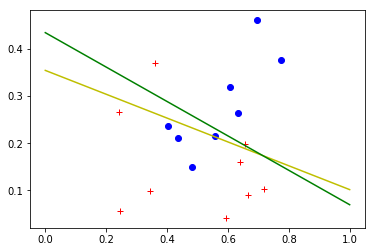

In [12]:
#画图显示最终结果
period = 9000
w2 = GD(w0, data, label,period)
import matplotlib.pyplot as plt
for i in range(data.shape[0]):
    if(label[i]==0):
        plt.plot(data[i][0],data[i][1],'r+')
    else:
        plt.plot(data[i][0],data[i][1],'bo')
x = np.linspace(0, 1, 50)
y1 = -w[0]/w[1]*x - w[2]/w[1]
y2 = -w2[0]/w2[1]*x - w2[2]/w2[1]
plt.plot(x,y,'y-')
plt.plot(x,y2,'g-')
plt.show()